# Numerically solving the Schrodinger equation

In this assignment you will use [<tt>qmsolve</tt>](https://github.com/quantum-visualizations/qmsolve) to solve the time-independent Schrodinger equation in one dimension and plot the solutions.

### First, install <tt>qmsolve</tt> in one of two ways:
<ul>
    <li>From a <tt>unix</tt> command line, type <tt>pip install qmsolve</tt></li>
    <li>Put the following commands in a code cell in this notebook and execute:<br />
        <tt>import sys</tt><br />
        <tt>!{sys.executable} -m pip install qmsolve</tt></li>
</ul>

In [1]:
import sys
!{sys.executable} -m pip install qmsolve

  Created wheel for progressbar: filename=progressbar-2.5-py3-none-any.whl size=12075 sha256=1361e1d71c47fc724c2fac02bb4858de6801747a7d5d3a36323a59206ce66734
  Stored in directory: /Users/garrettsnyder/Library/Caches/pip/wheels/2c/67/ed/d84123843c937d7e7f5ba88a270d11036473144143355e2747
Successfully built progressbar


### Homework problems:

<ol start=0>
    <li>Follow the link to the <tt>qmsolve</tt> GitHub page above. Click the link for the <tt>examples</tt> folder, then click on the <tt>eigenstate solver examples</tt> folder. Finally, click on <tt>1D_harmonic_oscillator.py</tt> to see a short code snippet that will calculate wavefunctions for a simple harmonic oscillator (SHO).</li>
    <li><tt>1D_harmonic_oscillator.py</tt> imports the <tt>Hamiltonian</tt> class from <tt>qmsolve</tt>. In quantum mechanics, what is a Hamiltonian? Please use multiple sources to formulate your answer and cite those sources. For this problem, crowd-sourced references such as Wikipedia and stackexchange are acceptable.</li>
    <li>Which force law is defined in the function <tt>harmonic_oscillator()</tt> in cell 2 of this notebook?</li>
    <li>What are the eigenstates referred to in lines 22 and 23 in <tt>1D_harmonic_oscillator.py</tt>? Again, please use multiple sources to formulate your answer and cite those sources.
    <li>Code cells 1 and 2 below contain imported code from <tt>1D_harmonic_oscillator.py</tt>, including a visualization of eigenstate 0 of the SHO. In subsequent code cells, plot any five SHO eigenstates of your choice.</li>
</ol>

Note: you can write your answers to the non-code problems in a markdown cell. From within a new notebook cell, click the box with a double arrow that says "Code" and change to "Markdown". Then you can just type in the cell like a regular text file.

1- In quantuma mechanics, a Hamiltonian is an operator of a system with relation to the systems total energy (KE + PE). In Classical mechancis the Hamiltonian is the sum of the kinetic energy operator and potential energy operator. (https://en.wikipedia.org/wiki/Hamiltonian_(quantum_mechanics))
Reitarting, each measurable parameter in a system has an operator. The operator for the total energy of a system is the Hamiltonian. (http://hyperphysics.phy-astr.gsu.edu/hbase/quantum/hamil.html)

2- The harmonic_oscillator() function returns the potential energy of a spring where particle.x is the location of the particle, and k is the spring constant as defined as k = 100xeV/A^2. The return of the harmonic_oscillator() function is an integral of Hookes Law which is used to show the force needed to displace a spring.

3- Eigenstates are numerical solutions with quantized values in quantum mechanics. Eigenstates are what allow wave equations and Schrodingers equations to be solved. They can be any value that satisfies the equation. (https://en.wikipedia.org/wiki/Quantum_state#:~:text=Numerical%20or%20analytic%20solutions%20in,quantized%20values%2C%20typically%20quantum%20numbers.)

In [7]:
import numpy as np
import matplotlib.pyplot as plt

from qmsolve import Hamiltonian, SingleParticle, init_visualization, Å, eV

Computing...
Took 0.027673006057739258
[ 13.8243627   41.46350403  69.08346722  96.68423227 124.26577906
 151.82808744 179.37113718 206.89490796 234.39937942 261.8845311
 289.35034249 316.79679298 344.22386192 371.63152856 399.01977209
 426.38857162 453.73790619 481.06775475 508.3780962  535.66890934
 562.9401729  590.19186555 617.42396585 644.63645231 671.82930335
 699.00249732 726.15601246 753.28982697 780.40391895 807.49826642]


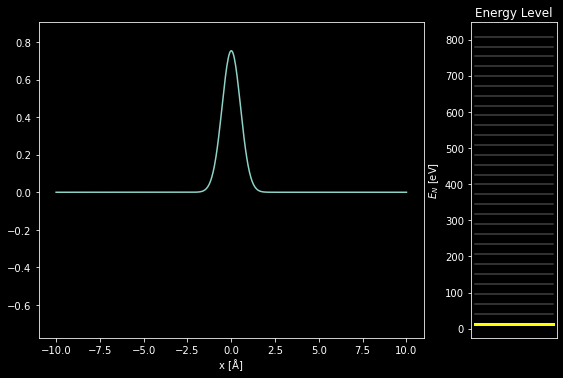

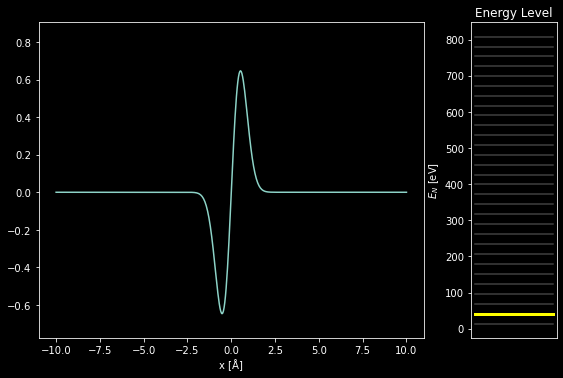

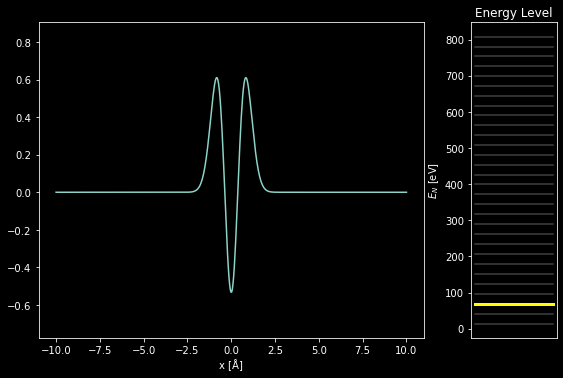

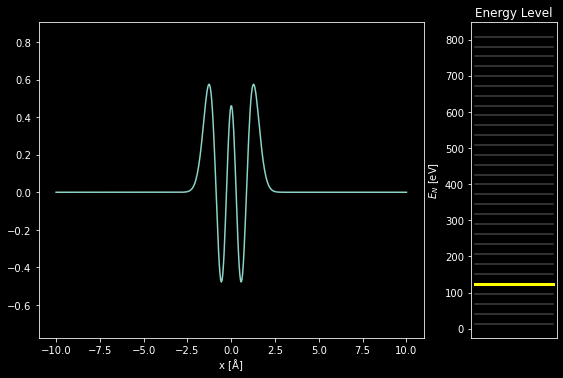

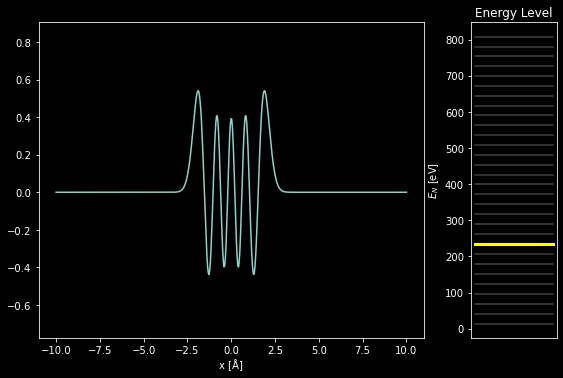

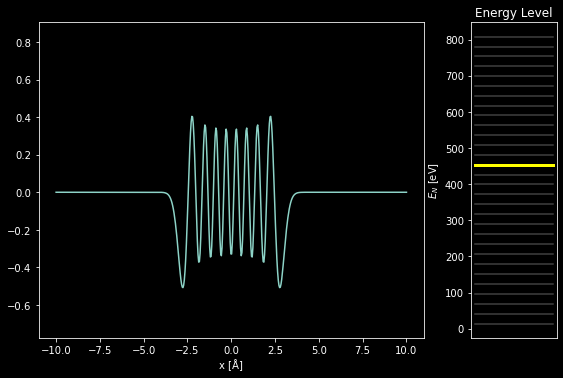

In [9]:
# Harmonic oscillator potential
def harmonic_oscillator(particle):
    k = 100 * eV / Å**2
    return 0.5 * k * particle.x**2

# Define the Hamiltonian
H = Hamiltonian(particles = SingleParticle(), potential = harmonic_oscillator, 
                spatial_ndim = 1, N = 512, extent = 20*Å)

#Diagonalize the Hamiltonian and compute the eigenstates
eigenstates = H.solve(max_states = 30)

# Print out the energies of the eigenstates
print(eigenstates.energies) # the printed energies are expressed in eV

# Visualize the Eigenstates
visualization = init_visualization(eigenstates)
visualization.plot_eigenstate(0)
visualization.plot_eigenstate(1)
visualization.plot_eigenstate(2)
visualization.plot_eigenstate(4)
visualization.plot_eigenstate(8)
visualization.plot_eigenstate(16)

<ol start=5>
    <li>What is on the x-axis of your plots?</li>
    <li>Are your plots showing wave functions $\psi(x)$ or probability functions $\psi^*(x) \psi(x)$? How do you know?</li>
</ol>

### New potential: infinite square well

Below I define the infinite square well potential and plot the two lowest-energy eigenstates (compare to Figure 6.3 in your textbook).

5- The x-axis of the plots above is a position in Aangstroms, which is a unit of measurement equal to 0.1 nanometers or 10x10^-10 meters. An incredibly small unit of measurement.

6- The plots are showing wave functions (psi(x)) because the eigenstate energy correpsonds to the wave function of a particle not the probability density.

Computing...
Took 0.02046680450439453
[  0.58926935   2.35704264   5.30321556   9.4276143   14.7299955
  21.21004635  28.8673845   37.70155819  47.71204619  58.89825789
  71.2595333   84.79514311  99.50428872 115.3861023  132.43964681
 150.6639161  170.05783494 190.6202591  212.34997539 235.24570176
 259.30608737 284.52971266 310.91508944 338.46066097 367.16480207
 397.0258192  428.04195057 460.21136622 493.53216816 528.00239048]


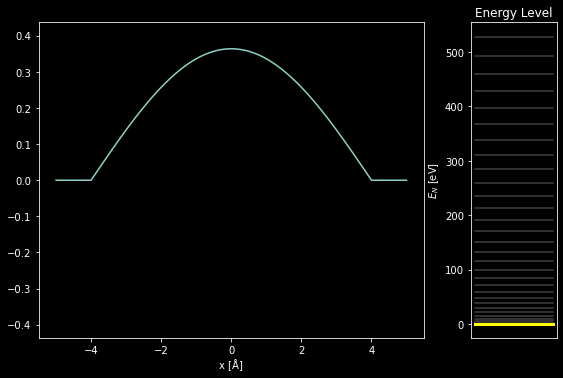

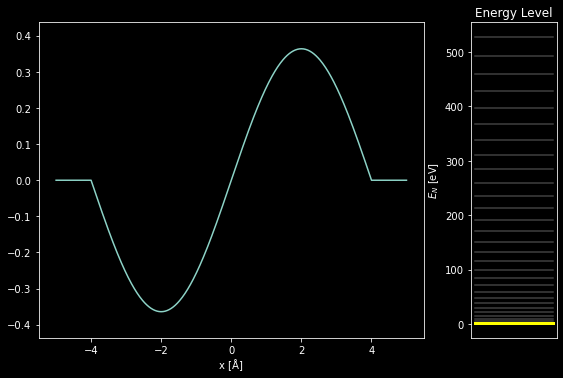

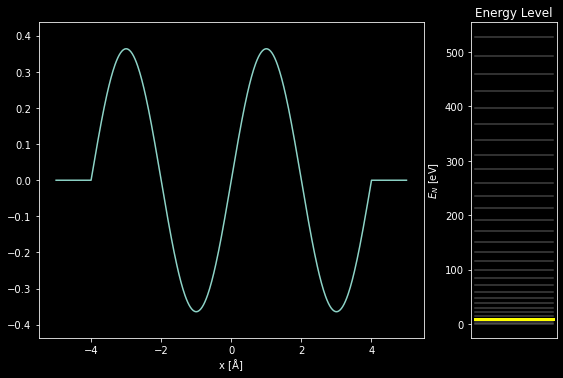

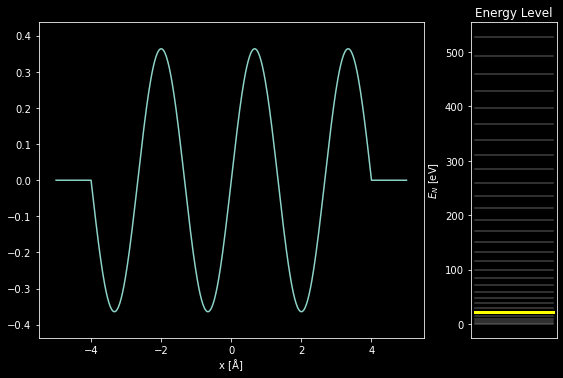

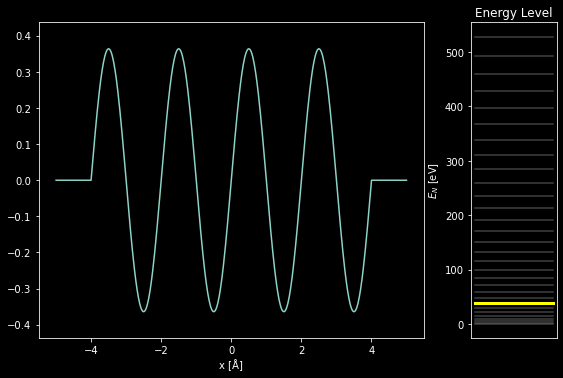

In [10]:
# 8 angstrom-wide infinite square well
def infinite_square_well(particle):
    potential = np.zeros_like(particle.x)
    out_of_bounds = np.abs(particle.x) > 4*Å
    potential[out_of_bounds] = np.inf
    return potential

# Define the Hamiltonian of the infinite square well
H_sw = Hamiltonian(particles = SingleParticle(), potential = infinite_square_well, 
                   spatial_ndim = 1, N = 512, extent = 10*Å)

# Diagonalize the Hamiltonian and compute the eigenstates
eigenstates_sw = H_sw.solve(max_states = 30)

print(eigenstates_sw.energies)

# Visualize the infinite square well eigenstates
visualization_sw = init_visualization(eigenstates_sw)
visualization_sw.plot_eigenstate(0)
visualization_sw.plot_eigenstate(1)
visualization_sw.plot_eigenstate(3)
visualization_sw.plot_eigenstate(5)
visualization_sw.plot_eigenstate(7)

<ol start=7>
    <li>Plot any three infinite square well eigenstates of your choice.</li>
    <li>What property do the infinite square well eigenstates have that's different than the SHO eigenstates? (Hint: think about the properties of valid wave functions we discussed in class)</li>
    <li>What is the relationship between the number of extrema (maxima plus minima) in each eigenstate plot and the quantum number of the eigenstate?</li>
</ol>

8- The difference in infinite square well eigenstates and SHO eigenstates lie in the boundary conditions. Eigenstates for infinite square wells are solutions in the set boundaries of 0 < x < L. Where as SHO eigenstates don't have hard boundary conditions.

9- The number of extrema and the quantum number of the eigenstate appear to have a linearly proportional relationship. As the quantum number of  the eigenstate increases the number number of extrema also increases. However the number of extrema seems to always be 1 greater than the quantum number. For example with a quantum number of 0 the number of extrema is 1, with a quantum number of 7 the number of extrema is 8.

### Now it's your turn to define a potential

<ol start=10>
    <li>Write a function that defines a <em>finite square-well</em> potential (textbook section 5.4). You can choose the width of the well in Angstroms and the potential at the walls in eV. Calculate the finite square-well Hamiltonian and plot any five eigenstates you choose.</li>
    <li>Based on your plots, do you think a particle can get out of the finite square-well potential no matter its quantum number $n$?</li>
</ol>

Computing...
Took 0.008561849594116211
[ 0.26011418  1.04044696  2.34096907  4.16163175  6.50236671  9.36308617
 12.74368285 16.64402996 21.06398122 26.00337088]


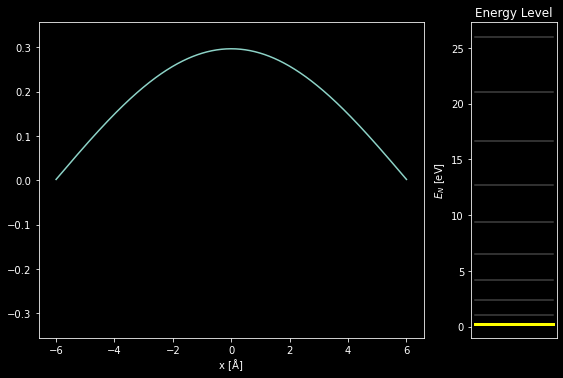

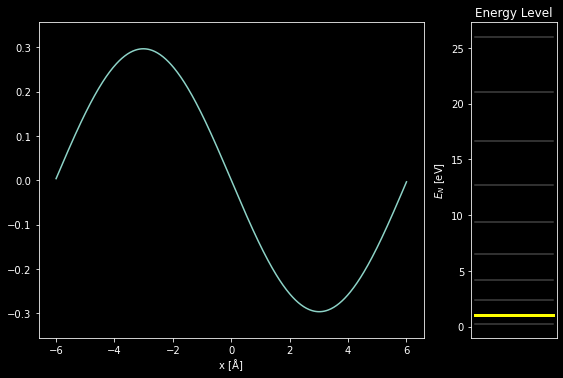

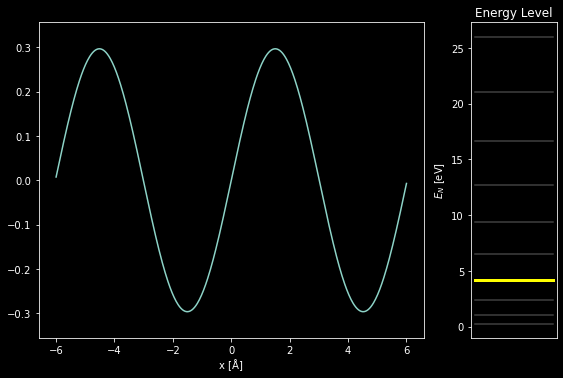

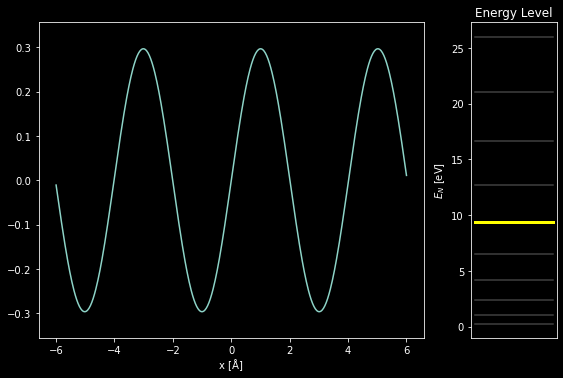

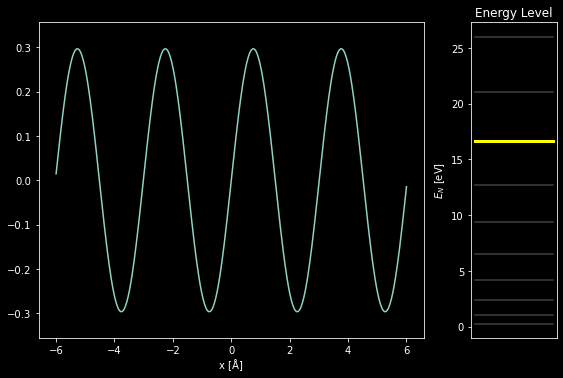

In [26]:
def finite_square_well(particle):
    potential = np.zeros_like(particle.x)
    out_of_bounds = np.abs(particle.x) > 6*Å
    potential[out_of_bounds] = 0
    return potential

# Define the Hamiltonian of the infinite square well
H_sw = Hamiltonian(particles = SingleParticle(), potential = finite_square_well, 
                   spatial_ndim = 1, N = 512, extent = 12*Å)

# Diagonalize the Hamiltonian and compute the eigenstates
eigenstates_sw = H_sw.solve(max_states = 10)

print(eigenstates_sw.energies)

# Visualize the infinite square well eigenstates
visualization_sw = init_visualization(eigenstates_sw)
visualization_sw.plot_eigenstate(0)
visualization_sw.plot_eigenstate(1)
visualization_sw.plot_eigenstate(3)
visualization_sw.plot_eigenstate(5)
visualization_sw.plot_eigenstate(7)


11- The probability of the particle being outside the square well increases as the energy of the particle increases. So by definition, a particle can be outside of the squarewell at any quantum number n but the probability is lower the smaller the quantum number.